In [1]:
from pprint import pprint
from base import *

## Check STORAGE and CUSTOM_SCR in setting.py

In [2]:
!cat ./setting.py

# STORAGE = '../storage'
# CUSTOM_SCR = 'custom'

# for example1
STORAGE = '../storage_example1'
CUSTOM_SCR = 'custom_example1'

# for example2
# STORAGE = '../storage_example2'
# CUSTOM_SCR = 'custom_example2'


In [3]:
!ls ./../storage_example1

README.md a1_b1.txt a1_b2.txt a2_b1.txt a2_b2.txt cache


## Read log files

In [4]:
!python3 load_storage.py

INFO:load_storage.py:<module>:save cache files in ../storage_example1/cache
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1522.71it/s]
INFO:load_storage.py:save_database:size is 4


## Database

In [5]:
root = '../storage_example1/cache'
database = Database(root)

### Check Parameters

In [6]:
database.params

{Param(a='a1', b='b1'),
 Param(a='a1', b='b2'),
 Param(a='a2', b='b1'),
 Param(a='a2', b='b2')}

### Interactive (automatic) dataset loading

In [7]:
print(database)

======== load datsets : size 0 ====================


In [8]:
# load (a, b) = (a1, b1) dataset
database['a1', 'b1']
print(database)

======== load datsets : size 1 ====================

dataset 0
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b1.txt', read_func=<function read at 0x108d11ee0>), None)
	size     4
	


In [9]:
# load (a, b) = (a1, b2) dataset
database[Param(a='a1', b='b2')]
print(database)

======== load datsets : size 2 ====================

dataset 0
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b1.txt', read_func=<function read at 0x108d11ee0>), None)
	size     4
	

dataset 1
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b2.txt', read_func=<function read at 0x108d11ee0>), None)
	size     3
	


### Free loaded dataset

In [10]:
database.free()
print(database)

======== load datsets : size 0 ====================


### Extruct database

In [11]:
# extract (a, b) = ('a1', 'b1') data
sub_database = database.sub(a='a1', b='b1')
print(sub_database)

======== load datsets : size 1 ====================

dataset 0
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b1.txt', read_func=<function read at 0x108d11ee0>), None)
	size     4
	


In [12]:
# show detail
sub_database.datas[Param(a='a2', b='b2')]

Dataset("LoadSet(LoadSetElement(file='../storage_example1/a2_b2.txt', read_func=<function read at 0x108d11ee0>), None)")

In [13]:
# show more detail
sub_database.datas[Param(a='a2', b='b2')].datas

[AttrDict({'time': 0.0, 'value': 10.0}),
 AttrDict({'time': 2.0, 'value': 15.0}),
 AttrDict({'time': 10.0, 'value': 20.0})]

In [14]:
# show more detail
dataset = sub_database[Param(a='a2', b='b2')]
print(dataset)
print(dataset.datas)

load_set LoadSet(LoadSetElement(file='../storage_example1/a2_b2.txt', read_func=<function read at 0x108d11ee0>), None)
size     3

[AttrDict({'time': 0.0, 'value': 10.0}), AttrDict({'time': 2.0, 'value': 15.0}), AttrDict({'time': 10.0, 'value': 20.0})]


### multi-process processing

In [15]:
database.free()
print(database)

======== load datsets : size 0 ====================


In [16]:
print(database.params)

{Param(a='a1', b='b2'), Param(a='a1', b='b1'), Param(a='a2', b='b2'), Param(a='a2', b='b1')}


In [17]:
# set the number of processes
database.setProcesses(2)
database.setTqdm()
print(database)

======== load datsets : size 0 ====================
processes: 2


In [18]:
# read all datas with parallel
database.setAll()

100%|██████████| 4/4 [00:00<00:00, 2379.41it/s]


## Plot

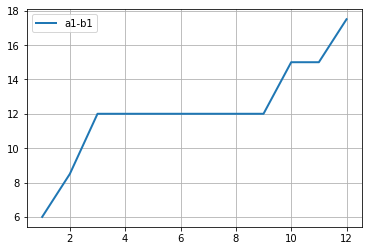

In [19]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b1',
)
ax.legend()
ax.grid('--')

[AttrDict({'time': 3.0, 'value': 0.0}),
 AttrDict({'time': 4.0, 'value': 1.0}),
 AttrDict({'time': 10.0, 'value': 2.0})]


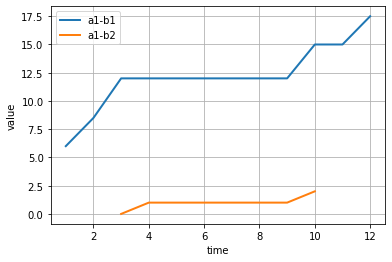

In [20]:
# add line
sub_database = database.sub(a='a1', b='b2')
pprint(sub_database.datas['a1', 'b2'].datas)

sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b2',
    fig=fig, ax=ax
)

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('value')

fig

### Extruct multi database

In [21]:
sub_database = database.sub(a='a1')
print(sub_database)

======== load datsets : size 2 ====================

dataset 0
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b2.txt', read_func=<function read at 0x108d11ee0>), None)
	size     3
	

dataset 1
   load_set LoadSet(LoadSetElement(file='../storage_example1/a1_b1.txt', read_func=<function read at 0x108d11ee0>), None)
	size     4
	


### meanplot

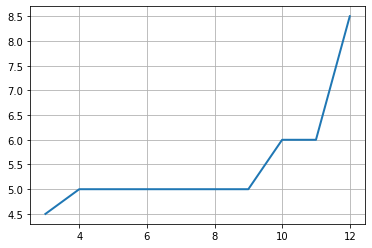

In [22]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='mean',
    plot_type='meanplot',
)
ax.grid('--')

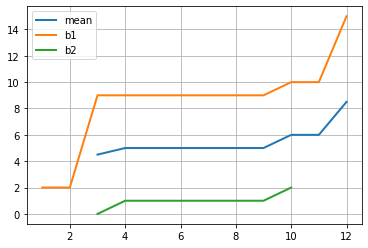

In [23]:
fig, ax = sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
fig, ax = sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)
ax.legend()
fig

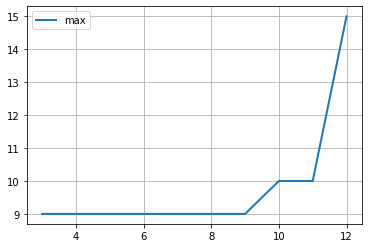

In [24]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='max',
    plot_type='maxplot',
)
ax.grid('--')
ax.legend()

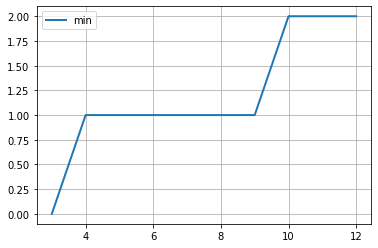

In [25]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='min',
    plot_type='minplot',
)
ax.grid('--')
ax.legend()